In [2]:
!pip install gensim

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import os,os.path
import gensim,re 

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for each in os.listdir(self.dirname):
            if each != '.DS_Store':
                logging.info('INITIATED: Processing sentences for '+each)
                with open(os.path.join(self.dirname,each,'sentences.txt'),'r', encoding='utf-8') as fin:
                    for line in fin:
                        review_text = re.sub("[^a-zA-Z]"," ", line)
                        yield review_text.split()
sentences = MySentences('E:\DONE')
from collections import defaultdict
d = defaultdict(lambda : 0)
for each in sentences:
    d[len(each)] += 1

2021-12-03 10:39:03,760 : INFO : INITIATED: Processing sentences for 3dprinting.meta.stackexchange.com
2021-12-03 10:39:03,941 : INFO : INITIATED: Processing sentences for android.meta.stackexchange.com
2021-12-03 10:39:04,255 : INFO : INITIATED: Processing sentences for android.stackexchange.com
2021-12-03 10:39:14,671 : INFO : INITIATED: Processing sentences for anime.meta.stackexchange.com
2021-12-03 10:39:15,219 : INFO : INITIATED: Processing sentences for anime.stackexchange.com
2021-12-03 10:39:18,584 : INFO : INITIATED: Processing sentences for apple.meta.stackexchange.com
2021-12-03 10:39:18,886 : INFO : INITIATED: Processing sentences for apple.stackexchange.com
2021-12-03 10:39:34,002 : INFO : INITIATED: Processing sentences for arduino.meta.stackexchange.com
2021-12-03 10:39:34,182 : INFO : INITIATED: Processing sentences for arduino.stackexchange.com
2021-12-03 10:39:42,808 : INFO : INITIATED: Processing sentences for astronomy.meta.stackexchange.com
2021-12-03 10:39:43,023

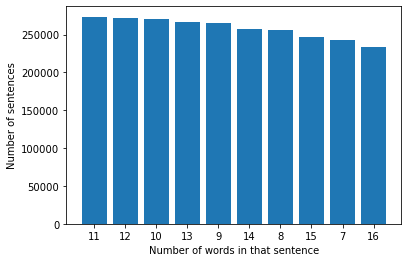

2021-12-03 10:41:04,485 : INFO : collecting all words and their counts
2021-12-03 10:41:04,485 : INFO : INITIATED: Processing sentences for 3dprinting.meta.stackexchange.com
2021-12-03 10:41:04,485 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-03 10:41:04,582 : INFO : INITIATED: Processing sentences for android.meta.stackexchange.com
2021-12-03 10:41:04,701 : INFO : PROGRESS: at sentence #10000, processed 162540 words, keeping 7811 word types
2021-12-03 10:41:04,862 : INFO : INITIATED: Processing sentences for android.stackexchange.com
2021-12-03 10:41:04,902 : INFO : PROGRESS: at sentence #20000, processed 333885 words, keeping 10893 word types
2021-12-03 10:41:05,118 : INFO : PROGRESS: at sentence #30000, processed 489039 words, keeping 13352 word types
2021-12-03 10:41:05,326 : INFO : PROGRESS: at sentence #40000, processed 650160 words, keeping 15137 word types
2021-12-03 10:41:05,530 : INFO : PROGRESS: at sentence #50000, processed 814274 words

In [4]:
#Identifying proper context parameter for word2vec model training.
import operator
d = dict(sorted(d.items(), key=operator.itemgetter(1), reverse=True)[:10])

import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
plt.ylabel("Number of sentences")
plt.xlabel("Number of words in that sentence")
plt.savefig('context.jpg')
plt.show()
# Set values for various parameters
#size = 300             # Word vector dimensionality                      
#min_count = 10         # Minimum word count                        
#workers = 4            # Number of threads to run in parallel
#window = 15           # Context window size                                                                                    
#sample = 1e-3          # Downsample setting for frequent words


model = gensim.models.Word2Vec(sentences,  workers=4, vector_size =300, min_count = 1, window = 15, sample = 1e-3)

In [5]:
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "stackexchange_model"
model.save(model_name)

2021-12-03 11:14:14,191 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'stackexchange_model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-12-03T11:14:14.191296', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2021-12-03 11:14:14,194 : INFO : storing np array 'vectors' to stackexchange_model.wv.vectors.npy
2021-12-03 11:14:20,464 : INFO : storing np array 'syn1neg' to stackexchange_model.syn1neg.npy
2021-12-03 11:14:27,134 : INFO : not storing attribute cum_table
2021-12-03 11:14:27,611 : INFO : saved stackexchange_model


In [7]:
print(len(model.wv.index_to_key))


435560


In [14]:
#man is to women as king is to ______
print (self.wv.most_similar((positive=['woman', 'king'], negative=['man'], topn=1))
#css is to html as java is to _______
print (model.wv.most_similar((positive=['java', 'html'], negative=['css'], topn=1))
#berlin is to germany as paris is to _________
print (model.wv.most_similar((positive=['paris', 'germany'], negative=['berlin'], topn=1))
#he is to his as she is to _______
print (model.wv.most_similar(positive=['she', 'his'], negative=['he'], topn=1))
#windows is to microsoft as osx is to __________
print (model.wv.most_similar((positive=['osx', 'microsoft'], negative=['windows'], topn=1))

SyntaxError: invalid syntax (<ipython-input-14-bf78f2b0e195>, line 2)

In [15]:
model = gensim.models.Word2Vec.load('stackexchange_model')

2021-12-03 11:32:43,787 : INFO : loading Word2Vec object from stackexchange_model
2021-12-03 11:32:44,333 : INFO : loading wv recursively from stackexchange_model.wv.* with mmap=None
2021-12-03 11:32:44,334 : INFO : loading vectors from stackexchange_model.wv.vectors.npy with mmap=None
2021-12-03 11:32:50,062 : INFO : loading syn1neg from stackexchange_model.syn1neg.npy with mmap=None
2021-12-03 11:32:55,751 : INFO : setting ignored attribute cum_table to None
2021-12-03 11:33:03,819 : INFO : Word2Vec lifecycle event {'fname': 'stackexchange_model', 'datetime': '2021-12-03T11:33:03.819390', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


In [17]:
print(model.wv.similarity('wallet','android'))
print(model.wv.similarity('wallet','purse'))
print(model.wv.similarity('windows','microsoft'))
print(model.wv.similarity('cyanogenmod','android'))

0.17865238
0.28110218
0.3826557
0.3127122
